In [1]:
import sys
sys.path.append('/home/n31v/workspace/Fedot.Industrial')
import pandas as pd
import torch
from torchvision.models import resnet18
from fedot_ind.core.operation.optimization.svd_tools import load_svd_state_dict
from optim.flops import flop

models = {
    'ResNet18': resnet18(num_classes=21)
}
state_dicts = {
    'full': '/media/n31v/data/results/LUSC/ResNet18_SVD_channel_O-100_H-0.1/0_0/train.sd.pt',
    'pruned': '/media/n31v/data/results/LUSC/ResNet18_SVD_channel_O-100_H-0.1/0_0/e_0.5.sd.pt'
}

for k, sd in state_dicts.items():
    for forward_mode in ['one_layer', 'two_layers', 'three_layers']:
        model = resnet18(num_classes=21)
        load_svd_state_dict(model=model, decomposing_mode='channel', state_dict_path=sd, forward_mode=forward_mode)
        models[f'{k} {forward_mode}'] = model

In [2]:
batch = 64
flop_df = {}
for size in range(50, 500, 100):
    flop_df[size] = {}
    for k, model in models.items():
        f = flop(model,'lusc', input_size=(batch, 3, size, size))
        flop_df[size][k] =sum ([v['flops'] for v in f.values()])
flop_df = pd.DataFrame(flop_df).T

for col in flop_df.columns[1:]:
    flop_df[col] = flop_df[col] / flop_df['ResNet18'] * 100

flop_df['ResNet18'] = 100
flop_df

STAGE:2023-07-19 15:57:18 798412:798412 ActivityProfilerController.cpp:311] Completed Stage: Warm Up
STAGE:2023-07-19 15:57:18 798412:798412 ActivityProfilerController.cpp:317] Completed Stage: Collection
STAGE:2023-07-19 15:57:18 798412:798412 ActivityProfilerController.cpp:321] Completed Stage: Post Processing
STAGE:2023-07-19 15:57:18 798412:798412 ActivityProfilerController.cpp:311] Completed Stage: Warm Up
STAGE:2023-07-19 15:57:18 798412:798412 ActivityProfilerController.cpp:317] Completed Stage: Collection
STAGE:2023-07-19 15:57:18 798412:798412 ActivityProfilerController.cpp:321] Completed Stage: Post Processing
STAGE:2023-07-19 15:57:18 798412:798412 ActivityProfilerController.cpp:311] Completed Stage: Warm Up
STAGE:2023-07-19 15:57:19 798412:798412 ActivityProfilerController.cpp:317] Completed Stage: Collection
STAGE:2023-07-19 15:57:19 798412:798412 ActivityProfilerController.cpp:321] Completed Stage: Post Processing
STAGE:2023-07-19 15:57:19 798412:798412 ActivityProfilerCo

,ResNet18,full one_layer,full two_layers,full three_layers,pruned one_layer,pruned two_layers,pruned three_layers
50,100,169.809719,175.608612,128.563692,114.818064,34.169312,31.674445
150,100,109.866914,123.251482,129.167099,102.094387,31.711859,32.226740
250,100,103.683150,117.873051,129.274921,100.781799,31.559128,32.391098
350,100,101.928264,116.369402,129.350903,100.409300,31.515763,32.438270
450,100,101.118679,115.602412,129.239340,100.237455,31.294151,32.244738


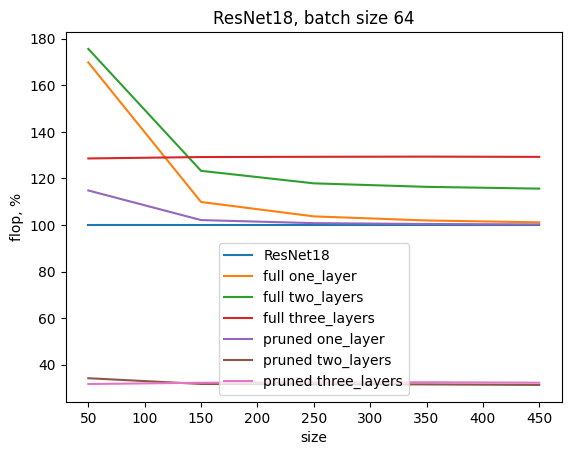

In [3]:
flop_df.iloc[:, :4].plot(xlabel='size', ylabel='flop, %', title=f'ResNet18, batch size {batch}');

In [ ]:
flop_df.iloc[:, [0, 4, 5, 6, 7]].plot(xlabel='size', ylabel='flop, %', title=f'ResNet18, batch size {batch}');